In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score


pd.set_option("display.max_columns", 50)

In [68]:
##Read Data

df = pd.read_csv(r"C:\Users\u1131051\Desktop\UPGRAD\Lead\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [70]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## CLEAN THE DATA 

In [71]:
# Standardizing column names
df.columns = ['_'.join(name.lower().split()[:3]) for name in df.columns]



In [72]:
#standardising categorical values
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.lower().str.replace(' ', '_').str.strip())



In [73]:
# Taking a look at all unique values for every column to check for abnormalities/inconsistencies
for col in df.columns[2:]:
    print(col.upper(), end=': ')
    print(df[col].unique())
    print()

LEAD_ORIGIN: ['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']

LEAD_SOURCE: ['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']

DO_NOT_EMAIL: ['no' 'yes']

DO_NOT_CALL: ['no' 'yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL_TIME_SPENT: [   0  674 1532 ...  603  483  927]

PAGE_VIEWS_PER: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.  

Issues by column:
By going through the above unique entires of every column, we have observed the following inconsistencies:

lead_source -> WeLearn and WeLearnblog_home are one and the same.testone,welingak_website seems similar  Facebook and social media are two different categories.

country -> "Australia", the asian Countries and "Asia/Pacific Region" are two different categories.

tags -> "invalid number" and "wrong number given" are one and the same. "already a student" and "graduation_in_progress "  are similar category 

last_activity and last_notable_activity are highly correlated. One of them should be dropped to avoid multi-collinearity.

Other potential issues:
Many columns exist with only a single category .
same category percieved as different due to not matching case. 
The value Select is equivalent to NaN.
Possible overlaps may exist in City column.

In [74]:
# drop duplicate columns
df.drop(['prospect_id', 'lead_number', 'receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to', 'last_activity'], axis=1, inplace=True)

In [75]:
# Replacing all 'select' values with NaN
df = df.replace('select', np.nan)

In [76]:
# replacing "wrong number given" with "invalid number"
df.tags = df.tags.replace("wrong_number_given", "invalid_number")

In [77]:
# replacing "already a student" with "graduation_in_progress "
df.tags = df.tags.replace("already a student", "graduation_in_progress ")

In [78]:
# Cleaning "lead_source column"
value_counts = df.lead_source.value_counts()

In [79]:
df.describe()

,converted,totalvisits,total_time_spent,page_views_per,asymmetrique_activity_score,asymmetrique_profile_score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [80]:
# Values with less than 30 frequency are moved under "others"
df.lead_source = df.lead_source.replace(value_counts[value_counts < 30].index, "others")

In [81]:
# Cleaning "country"
value_counts = df.country.value_counts()

In [82]:
 ##We will categorise Country in binary as 'India' and 'Other' 
df.country = df.country.replace(df.country[df.country != 'india'].dropna().unique(), "others")

##Dealing with NaN values

In [83]:
# Percentage of NA values in every column
round(df.isna().sum().sort_values(ascending=False)/len(df)*100, 2)

how_did_you                    78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_profile_index     45.65
asymmetrique_activity_index    45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
page_views_per                  1.48
totalvisits                     1.48
lead_source                     0.39
through_recommendations         0.00
a_free_copy                     0.00
lead_origin                     0.00
newspaper_article               0.00
digital_advertisement           0.00
newspaper                       0.00
x_education_forums              0.00
magazine                        0.00
search                          0.00
total_time_spent                0.00
converted                       0.00
d

In [84]:
# Column "how_did_you" has too many NA values that can not be imputed. It is better to drop the column. 
df.drop('how_did_you', axis=1, inplace=True)


df.drop('lead_profile', axis=1, inplace=True)

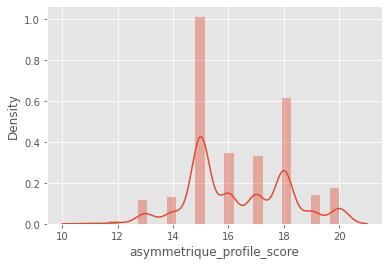

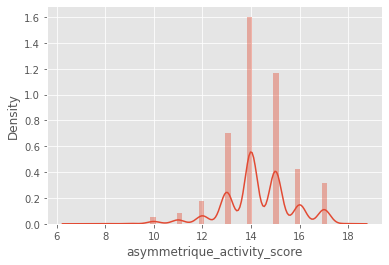

Both scores roughly follow standard distribution, therefore imputation can be done by median value.


In [85]:
# Asymmetrique scores
for col in ['profile_score', 'activity_score']:
    sns.distplot(df['asymmetrique_'+col].dropna())
    plt.show()
    
print(f"Both scores roughly follow standard distribution, therefore imputation can be done by median value.")

# Dropping Scores (Only Indexes will be used)
df.drop(['asymmetrique_profile_score', 'asymmetrique_activity_score'], axis=1, inplace=True)

# Removing initial numbers from category naming
df['asymmetrique_profile_index'] = df['asymmetrique_profile_index'].str[3:]
df['asymmetrique_activity_index'] = df['asymmetrique_activity_index'].str[3:]

# Replacing nan with most commonly occuring category
df['asymmetrique_activity_index'].fillna(df['asymmetrique_activity_index'].mode().values[0], inplace=True)
df['asymmetrique_profile_index'].fillna(df['asymmetrique_profile_index'].mode().values[0], inplace=True)

In [86]:
# Imputing for 'Country' and 'City'
print("\nWe'll first try understanding how cities are labelled for different country categories\n")

for country in df.country.dropna().unique():
    print(country.upper())
    print(df[df.country == country]['city'].value_counts())
    print()
    


We'll first try understanding how cities are labelled for different country categories

INDIA
mumbai                         2918
thane_&_outskirts               651
other_cities                    564
other_cities_of_maharashtra     391
other_metro_cities              345
tier_ii_cities                   69
Name: city, dtype: int64

OTHERS
mumbai                         93
other_cities                   67
other_cities_of_maharashtra    23
thane_&_outskirts              21
other_metro_cities             20
tier_ii_cities                  3
Name: city, dtype: int64




## It looks like customers outside India are wrongly marked as being from domestic cities.\n

## Look at how countries are labeled with respect to city categories

In [91]:

for city in df.city.dropna().unique():
    print(city.upper())
    print(df[df.city == city]['country'].value_counts())
    print()
    


MUMBAI
india    4683
Name: country, dtype: int64

THANE_&_OUTSKIRTS
india    731
Name: country, dtype: int64

OTHER_METRO_CITIES
india    360
Name: country, dtype: int64

INTERNATIONAL
others    287
Name: country, dtype: int64

OTHER_CITIES
india    619
Name: country, dtype: int64

OTHER_CITIES_OF_MAHARASHTRA
india    434
Name: country, dtype: int64

TIER_II_CITIES
india    71
Name: country, dtype: int64



In [92]:
# We will make a new city label ('international') for countries labeled as 'others'
df.city[df.country == "others"] = df.city[df.country == "others"].replace(df.city[df.country == "others"].unique(), 'international')


In [93]:

# We'll also assume that rows with a domestic city label will have to have country label as 'india'.
df.country[(df.city != "international") & ~df.city.isna()] = 'india'


In [94]:

# We'll assume that rows with a country label 'india 'will have most frequently occuring city label.
df.city[(df.country == "india") & (df.city.isna())] = 'mumbai'

## Mark countries and Cities where NA  as unkmown

In [95]:
df[['city', 'country']] = df[['city', 'country']].fillna('unknown', axis=1)

In [96]:
df.describe()

,converted,totalvisits,total_time_spent,page_views_per
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


##There are too many na values in the  below columns , so we will drop them 

In [97]:
df.drop(['specialization', 'tags', 'what_matters_most', 'what_is_your'] , axis=1, inplace=True)

In [98]:
# dummy encoding for the categorical variables
dummies = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True)

# getting the cleaned df
clean_df = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
clean_df = pd.concat([clean_df, dummies], axis=1)

clean_df.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_origin_quick_add_form,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,...,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## EXPLORATORY DATA ANALYSIS

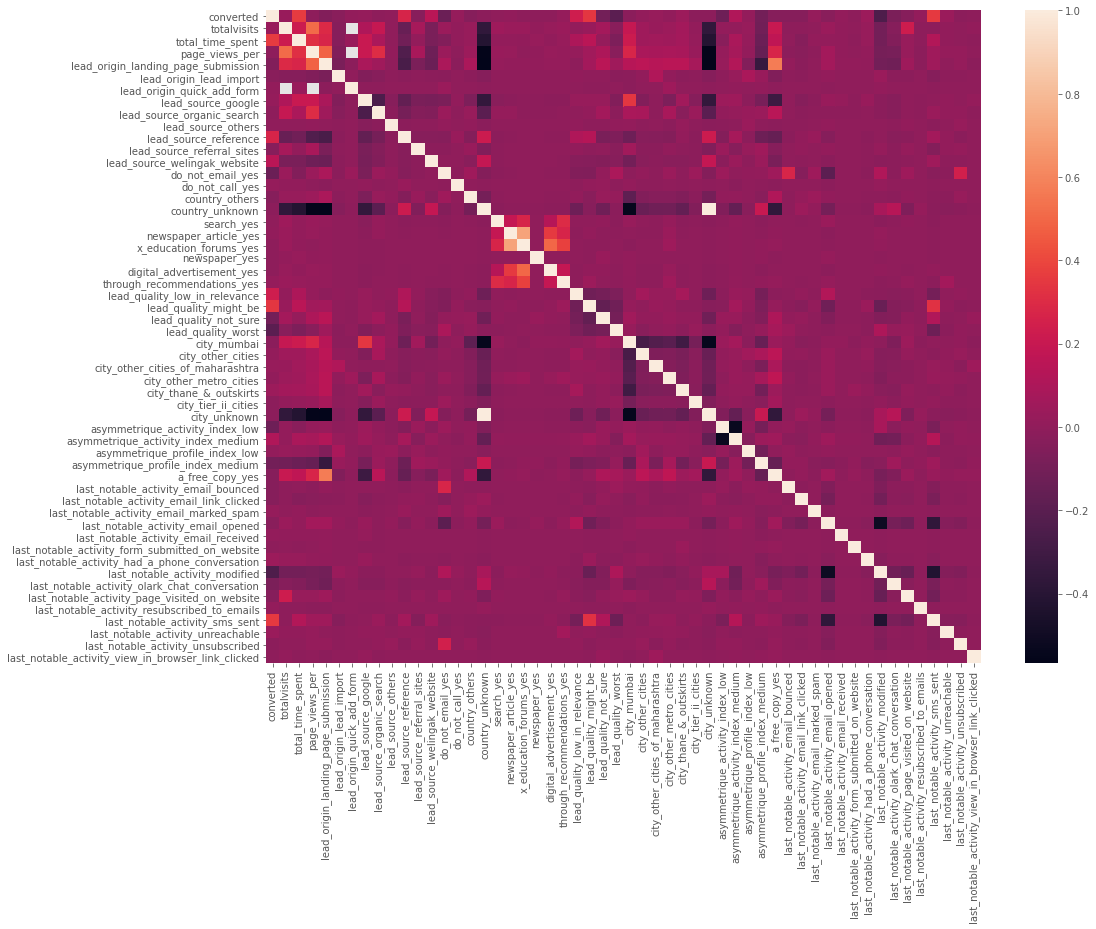

In [104]:
# visualizing correlation by heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(clean_df.corr())
plt.show()

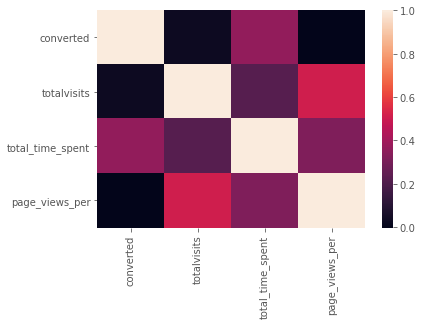

In [105]:
# heatmap of only continuous variables
sns.heatmap(clean_df[clean_df.columns[:4]].corr())
plt.show()

In [101]:
# columns pairs in order of highest absolute correlation
clean_df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

converted                            converted                          1.000000
lead_origin_lead_import              lead_source_facebook               0.981709
lead_source_reference                lead_origin_lead_add_form          0.853237
country_unknown                      lead_source_olark_chat             0.780025
newspaper_article_yes                x_education_forums_yes             0.707069
lead_origin_landing_page_submission  a_free_copy_yes                    0.569633
                                     city_unknown                       0.566011
city_unknown                         page_views_per                     0.558470
country_unknown                      city_mumbai                        0.542145
asymmetrique_activity_index_medium   asymmetrique_activity_index_low    0.526976
lead_origin_landing_page_submission  lead_source_olark_chat             0.512950
page_views_per                       totalvisits                        0.512125
dtype: float64

In [102]:
# Dropping variables with high multi-collinearity
clean_df.drop(['lead_source_facebook', 'lead_origin_lead_add_form', 'lead_source_olark_chat'], axis=1, inplace=True)

# Top 5 features correlated with target variable
clean_df.corr()['converted'].abs().sort_values(ascending=False).head(6)[1:]

total_time_spent                  0.362483
last_notable_activity_sms_sent    0.351845
lead_quality_might_be             0.342988
lead_source_reference             0.270830
last_notable_activity_modified    0.244294
Name: converted, dtype: float64

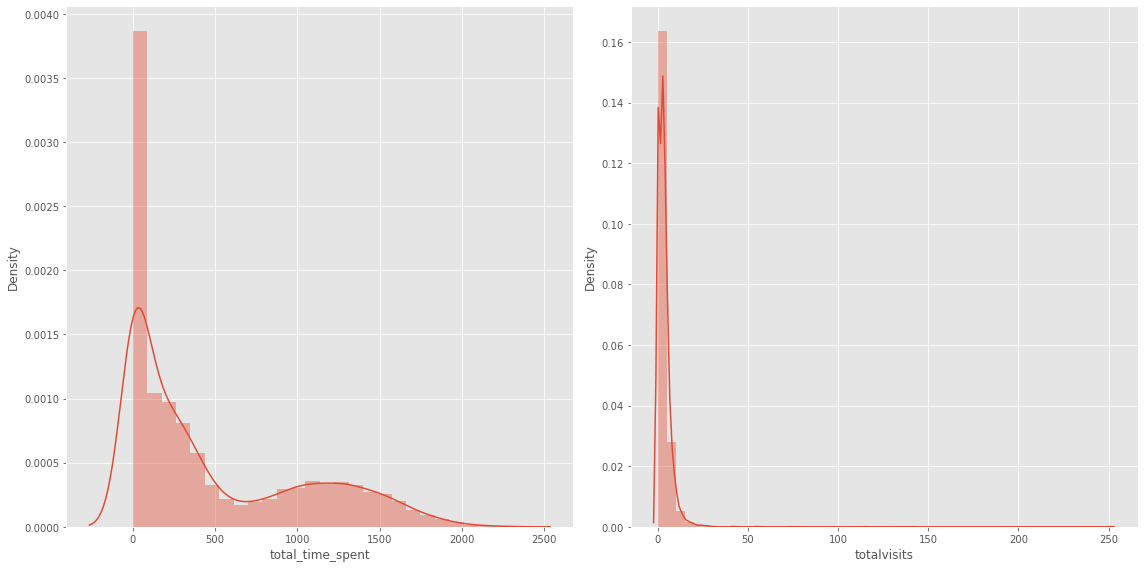

In [103]:
#Histogram
def plot_bars():
    plt.figure(figsize=(16, 8))
    plt.subplot(121)
    sns.distplot(clean_df['total_time_spent'])

    plt.subplot(122)
    sns.distplot(clean_df['totalvisits'])

    plt.tight_layout()
    plt.show()
    
plot_bars()

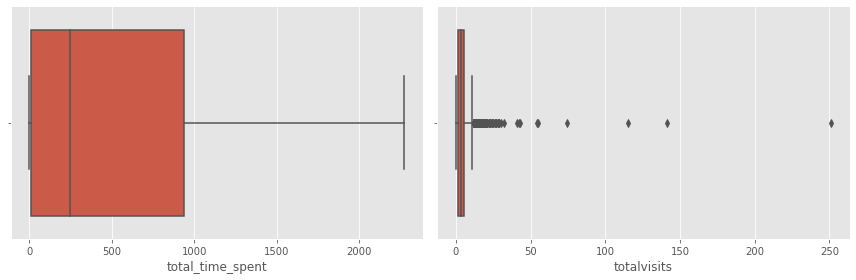

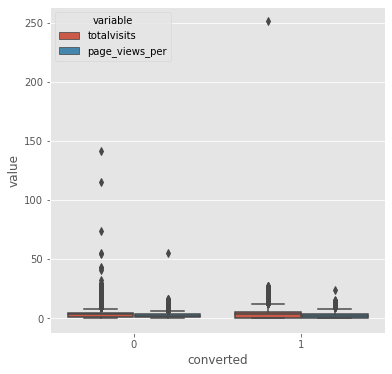

In [106]:
num_df = clean_df[['converted', 'totalvisits',  'page_views_per', 'total_time_spent']]

def plot_boxes():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.boxplot(data=clean_df, x='total_time_spent')

    plt.subplot(122)
    sns.boxplot(data=clean_df, x='totalvisits')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    box_long = pd.melt(num_df.drop('total_time_spent', axis=1), id_vars='converted')
    sns.boxplot(x='converted', y='value', hue='variable', data=box_long)
    plt.show()
    
plot_boxes()


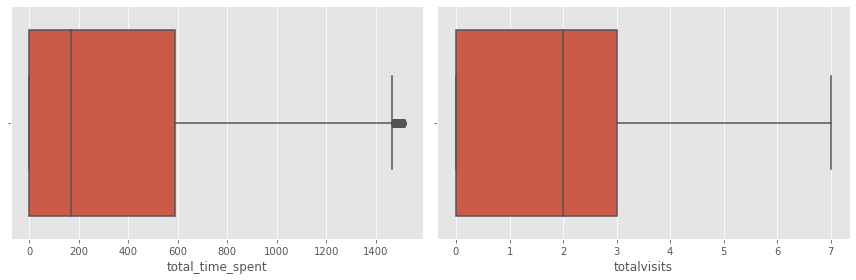

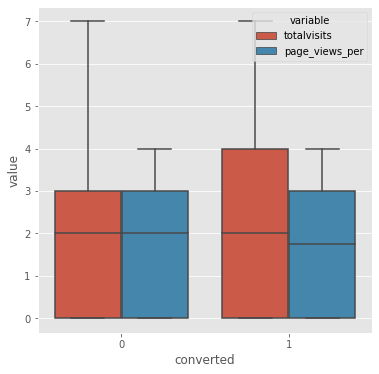

In [108]:
# Removing outliers
out_df = num_df.drop('converted', axis=1)
q = out_df.quantile(0.97)
out_df = out_df[out_df < q]
out_df = out_df.dropna()

clean_df = clean_df.loc[out_df.index].reset_index(drop=True)
num_df = num_df.loc[out_df.index].reset_index(drop=True)

plot_boxes()

##Bivariate Analysis

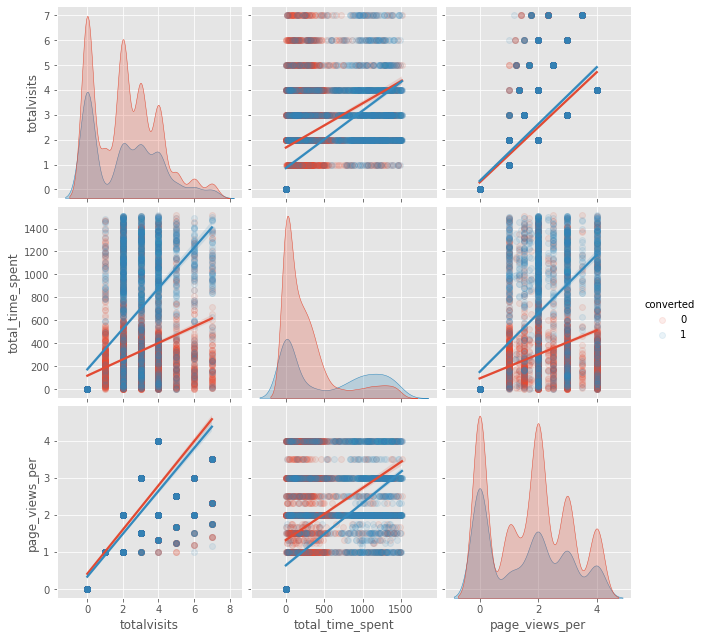

In [109]:
sns.pairplot(data=clean_df, vars=clean_df.columns[1:4], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()

# BUILD MODEL 

In [130]:
## SPlit into TRAIN and TEST 
X = clean_df.drop('converted', axis=1)
y = clean_df['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

In [131]:
# Min Max Scaling
scaler = MinMaxScaler()
cols = X_train.columns
scale_X_train = pd.DataFrame(scaler.fit_transform(X_train[cols[:3]]), columns=cols[:3])
scale_X_train = pd.concat([scale_X_train, X_train.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

scale_X_test = pd.DataFrame(scaler.transform(X_test[cols[:3]]), columns=cols[:3])
scale_X_test = pd.concat([scale_X_test, X_test.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

In [132]:
pca = PCA(random_state=42)
decomp_df = pca.fit_transform(scale_X_train[cols[:3]])
pc_frame = pd.DataFrame({'Features': cols[:3], 'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2]})
pc_frame

,Features,PC1,PC2,PC3
0,totalvisits,0.532197,-0.261473,0.805232
1,total_time_spent,0.467108,0.883934,-0.021694
2,page_views_per,0.706100,-0.387676,-0.592563


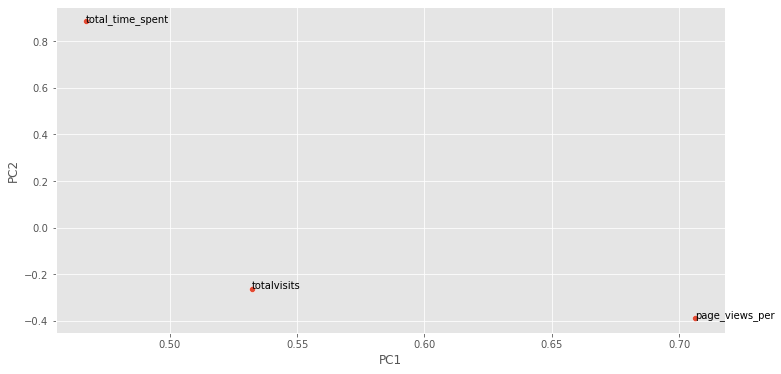

In [133]:
# Plotting 2 principal compnonents for the numeric variables
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pc_frame, x='PC1', y='PC2')
for i, text in enumerate(pc_frame.Features):
    plt.annotate(text, (pc_frame.PC1[i], pc_frame.PC2[i]))

plt.show()

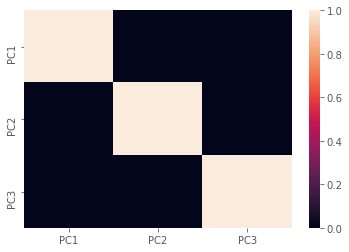

In [134]:
decomposed_df = pd.DataFrame(decomp_df, columns=['PC1', 'PC2', 'PC3'])
sns.heatmap(decomposed_df.corr())
plt.show()

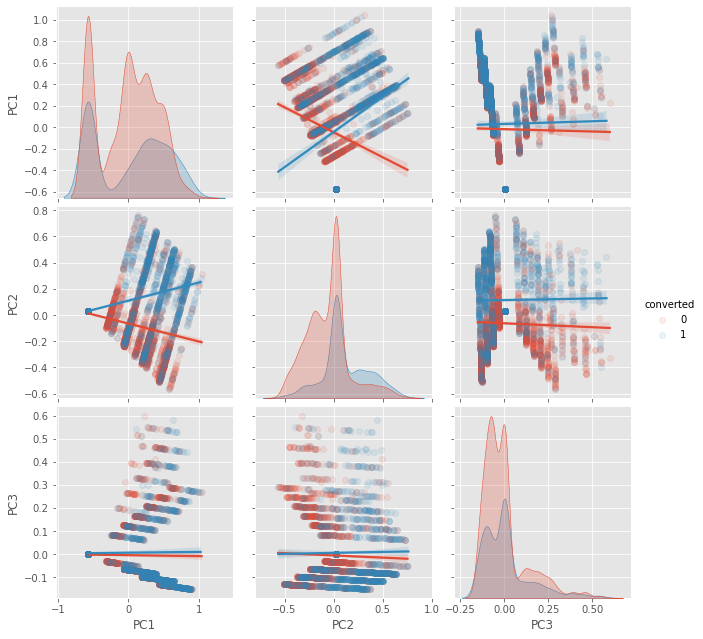

In [136]:
# Pairplot Of all 3 PCs
sns.pairplot(data=pd.concat([decomposed_df, y_train.reset_index(drop=True)], axis=1),
             vars=['PC1', 'PC2', 'PC3'], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})

plt.show()

##Recurssive Feature Elimination and Cross Validation

In [140]:
def optimal_features(min, max):
    
    opt = list()
    for features in range(min, max):
        log_reg = LogisticRegression(C=2, random_state=42)
        rfe = RFE(log_reg, features)
        rfe.fit(scale_X_train, y_train)
        cols = scale_X_train.columns[rfe.support_]

        # Cross Validation
        scores = cross_validate(log_reg, scale_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
        opt.append((features, scores['test_accuracy'].mean()))
        
    opt = np.array(opt) 
    return opt, opt[opt[:, 1].argmax()]
    

feat_array, opt_features = optimal_features(10, 50)

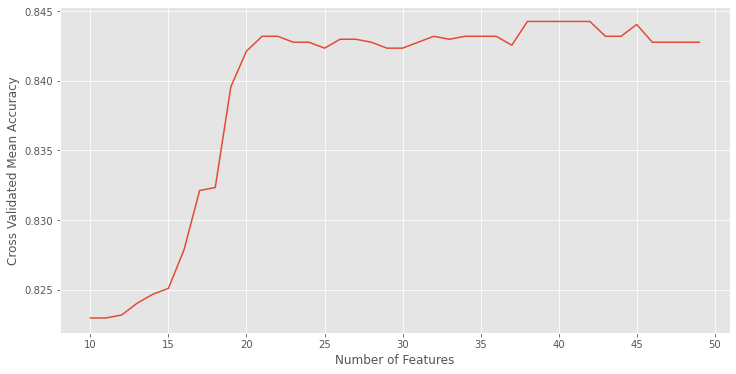

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(feat_array[:, 0], feat_array[:, 1])
plt.xlabel("Number of Features")
plt.ylabel("Cross Validated Mean Accuracy")
plt.show()

In [146]:
# RFE
log_reg = LogisticRegression(C=2, random_state=42)
rfe = RFE(log_reg, int(opt_features[0]))
rfe.fit(scale_X_train, y_train)
cols = scale_X_train.columns[rfe.support_]


In [147]:
print(f"The columns we'll be using are:\n\n{cols}")

The columns we'll be using are:

Index(['totalvisits', 'total_time_spent', 'page_views_per',
       'lead_origin_landing_page_submission', 'lead_origin_lead_import',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral_sites', 'lead_source_welingak_website',
       'do_not_email_yes', 'country_unknown', 'search_yes',
       'digital_advertisement_yes', 'through_recommendations_yes',
       'lead_quality_low_in_relevance', 'lead_quality_might_be',
       'lead_quality_not_sure', 'lead_quality_worst', 'city_other_cities',
       'city_other_cities_of_maharashtra', 'city_other_metro_cities',
       'city_thane_&_outskirts', 'city_tier_ii_cities', 'city_unknown',
       'asymmetrique_activity_index_low', 'asymmetrique_profile_index_medium',
       'a_free_copy_yes', 'last_notable_activity_email_link_clicked',
       'last_notable_activity_email_opened',
       'last_notable_activity_form_submitted_on_website',
       'last_notable_activity_had_a_phone_conversa

##VIF

In [149]:
def get_vif():
    vif = pd.DataFrame()
    vif['Features'] = scale_X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(scale_X_train[cols].values, i) for i in range(scale_X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
get_vif()

,Features,VIF
23,city_unknown,inf
10,country_unknown,inf
2,page_views_per,10.49
0,totalvisits,7.92
31,last_notable_activity_modified,6.77
28,last_notable_activity_email_opened,6.20
25,asymmetrique_profile_index_medium,5.89
3,lead_origin_landing_page_submission,5.53
35,last_notable_activity_sms_sent,5.46
1,total_time_spent,2.40


In [150]:
cols = cols.drop('total_time_spent')
get_vif().head()

,Features,VIF
9,country_unknown,inf
22,city_unknown,inf
1,page_views_per,10.45
0,totalvisits,7.83
30,last_notable_activity_modified,6.57


In [152]:
to_drop = ['last_notable_activity_resubscribed_to_emails', 'lead_source_welingak_website']
X_train_sm = sm.add_constant(scale_X_train[cols].drop(to_drop, axis=1))
logm2 = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 4700
Model:                            GLM   Df Residuals:                     4665
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.5
Date:                Sat, 25 Feb 2023   Deviance:                       4043.0
Time:                        13:38:15   Pearson chi2:                 5.16e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                               0.3878      0.547      0.709      0.478      -0.684       1.459
totalvisits                                         0.9176      0.256      3.587      0.000       0.416       1.419
page_views_per                                     -0.7067      0.231     -3.062      0.002      -1.159      -0.254
lead_origin_landing_page_submission                -0.6261      0.134     -4.658      0.000      -0.890      -0.363
lead_origin_lead_import                            -0.3336      0.494     -0.675      0.500      -1.302       0.635
lead_source_others                                  0.7064      0.671      1.053      0.293      -0.609       2.022
lead_source_reference                               2.2638      0.241      9.407      0.000       1.792       2.735
lead_source_referral_sites                         -0.3710      0.426     -0.871      0.384      -1.206       0.464
do_not_email_yes                                   -1.0312      0.223     -4.616      0.000      -1.469      -0.593
country_unknown                                    -0.0231      0.074     -0.313      0.754      -0.168       0.122
search_yes                                          1.3768      1.440      0.956      0.339      -1.446       4.200
digital_advertisement_yes                          21.8282   2.94e+04      0.001      0.999   -5.76e+04    5.76e+04
through_recommendations_yes                       -21.8153   3.25e+04     -0.001      0.999   -6.38e+04    6.37e+04
lead_quality_low_in_relevance                       2.5409      0.185     13.747      0.000       2.179       2.903
lead_quality_might_be                               1.4503      0.112     12.987      0.000       1.231       1.669
lead_quality_not_sure                              -0.7380      0.139     -5.311      0.000      -1.010      -0.466
lead_quality_worst                                 -2.9060      0.509     -5.710      0.000      -3.903      -1.909
city_other_cities                                   0.3454      0.178      1.940      0.052      -0.004       0.694
city_other_cities_of_maharashtra                    0.4412      0.193      2.289      0.022       0.063       0.819
city_other_metro_cities                             0.5776      0.219      2.633      0.008       0.148       1.008
city_thane_&_outskirts                              0.4150      0.153      2.706      0.007       0.114       0.716
city_tier_ii_cities                                -0.9050      0.648     -1.397      0.163      -2.175       0.365
city_unknown                                       -0.0231      0.074     -0.313      0.754      -0.168       0.122
asymmetrique_activity_index_low                    -1.9499      0.3

In [155]:
# Cross Validation
scores = cross_validate(log_reg, scale_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
print(f"Cross validated mean accuracy: {round(scores['test_accuracy'].mean(), 3)}")

log_reg.fit(scale_X_train[cols], y_train)
pred = log_reg.predict(scale_X_train[cols])
prob_est = log_reg.predict_proba(scale_X_train[cols])

Cross validated mean accuracy: 0.821


###Model PERFORMANCE

Sensitivity (Recall): 0.6736905478627333
Specificity: 0.9055610398157289
Precision: 0.7958748221906117
F-Score: 0.7297032931203129


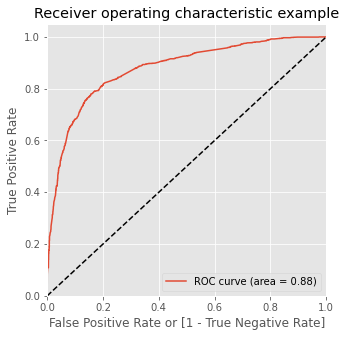

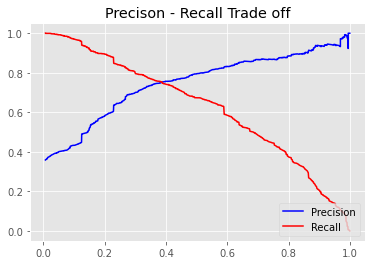

In [156]:
def draw_roc(actual_values, probability_estimates):
    fpr, tpr, thresholds = roc_curve(actual_values, probability_estimates, drop_intermediate=False)
    auc_score = roc_auc_score(actual_values, probability_estimates)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc_score, 2)})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def draw_prec_recall(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

def get_metrics(y, pred, prob_est):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)

    # Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    # Reciever Operating Characteristic Curve
    draw_roc(y, prob_est[:, 1])

    # Precision Recall Curve
    draw_prec_recall(y, prob_est[:, 1])
    
get_metrics(y_train, pred, prob_est)

###Optimal cutoff

In [160]:
y_train_pred_final = pd.DataFrame({'Converted':y_train, 'probability': prob_est[:, 1]})
numbers = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.probability.map(lambda x: 1 if x > i else 0)

# Making cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)

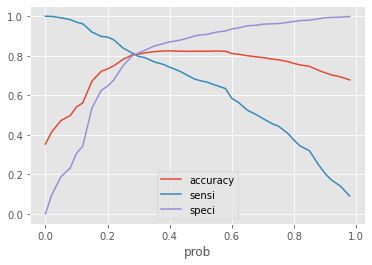

Optimum cut-off value is: 0.28


In [161]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

Accuracy: 0.8048936170212766
Sensitivity (Recall): 0.8133654425045154
Specificity: 0.8002632444883185
Precision: 0.6899897854954035
F-Score: 0.7466150870406189


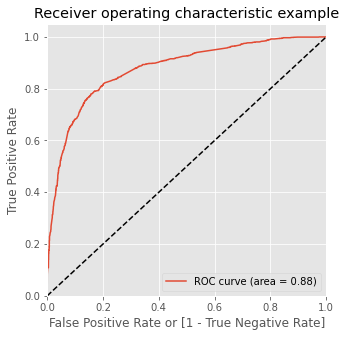

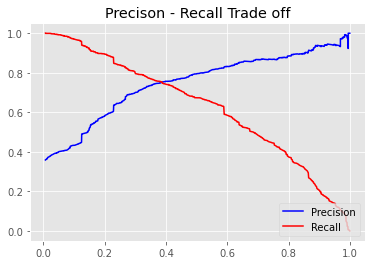

In [163]:
# new predicted values based on cut-off
pred = (log_reg.predict_proba(scale_X_train[cols])[:, 1] >= cutoff_value).astype(int)
print(f"Accuracy: {accuracy_score(y_train, pred)}")
get_metrics(y_train, pred, prob_est)

## MEasure Performance

accuracy: 0.803023758099352
Sensitivity (Recall): 0.7958435207823961
Specificity: 0.8069472277889111
Precision: 0.6925531914893617
F-Score: 0.7406143344709897


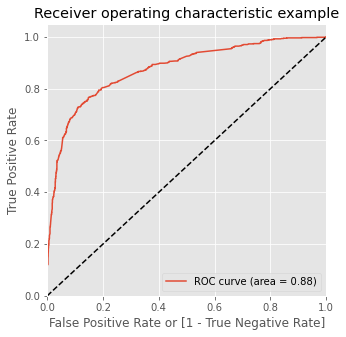

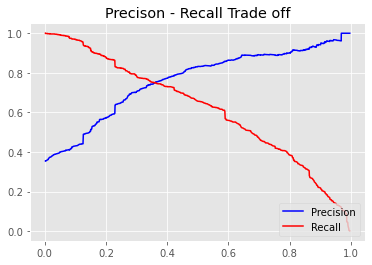

In [166]:
log_reg.fit(scale_X_train[cols], y_train)
pred = (log_reg.predict_proba(scale_X_test[cols])[:, 1] >= cutoff_value).astype(int)
prob_est = log_reg.predict_proba(scale_X_test[cols])
print(f"accuracy: {accuracy_score(y_test, pred)}")
get_metrics(y_test, pred, prob_est)

###Lead scoring

In [167]:
scores = pd.DataFrame({'lead_score':(prob_est[:, 1]*100).astype('int'), 'predicted_outcome': pred, 'actual_outcome': y_test}).reset_index(drop=True)
scores.head()

,lead_score,predicted_outcome,actual_outcome
0,6,0,0
1,58,1,1
2,86,1,1
3,12,0,0
4,19,0,0
